# INSTRUMENTAL A

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import t

## Curva volumétrica bureta 14

Em aula de Analise Instrumental A, diciplina da UFMG, iniciamos analisando as buretas utilizadas nos experiemntos de forma que façamos as correções volumétricas, pois as buretas possuem erro entre o quanto foi observado e o quanto de fato foi utilizado. 

A próxima célula apresenta os volumes medidos em uma bureta de $10~mL$ e a massa pesada de água, relacionamos a densidade, pressão atmosferica e temperatura para podermos fazer a equação de correção da bureta 14.

[[ 470.00987597  471.71109812  474.64098072]
 [ 938.03499275  932.83681395  929.24534496]
 [1874.36876335 1869.45412158 1861.04252315]
 [3745.99666879 3749.21008842 3752.99058209]
 [5640.96912267 5626.69775905 5628.96605526]
 [7518.17325628 7509.10007146 7522.520824  ]
 [9416.73717914 9398.02373546 9408.70363009]]
Média por linha: [ 472.1206516   933.37238389 1868.28846936 3749.3991131  5632.21097899
 7516.59805058 9407.8215149 ]
R² = 0.9999966


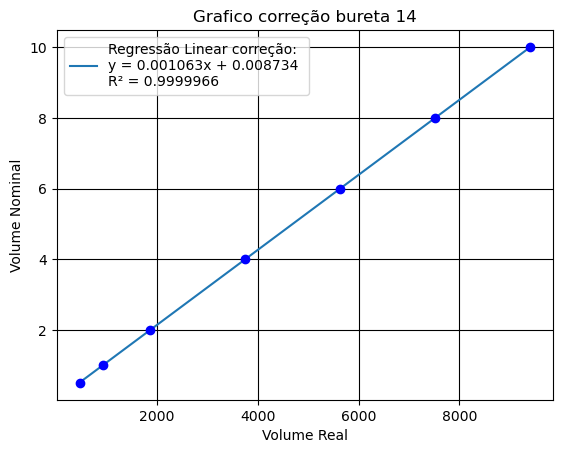

In [4]:
dh= 0.996089
da=0.001061
ta=30
t=28.5
pa=923
g=10**(-5)

def v_m (m):
    v=m*(1/(dh*da))*(1-da)*(1-g*(t-20))
    return v

y=np.array([[0.4973,0.4991,0.5022],
            [0.9925,0.9870,0.9832],
            [1.9832,1.9780,1.9691],
            [3.9635,3.9669,3.9709],
            [5.9685,5.9534,5.9558],
            [7.9547,7.9451,7.9593],
            [9.9635,9.9437,9.9550]])
v=v_m(y)
print (v)

media_volume = np.mean(v, axis=1)
print("Média por linha:", media_volume)

vn=np.array([0.5,1,2,4,6,8,10])

# Regressão linear
coefficients = np.polyfit(media_volume,vn, 1)  # Coeficientes da regressão linear
poly = np.poly1d(coefficients)   # Objeto polinomial
vn_fit = poly(media_volume)  # Valores ajustados
ss_res = np.sum((vn - vn_fit) ** 2)  # Soma dos quadrados dos resíduos
ss_tot = np.sum((vn - np.mean(vn)) ** 2)  # Soma dos quadrados totais
r_squared = 1 - (ss_res / ss_tot)
# Exibe o valor de R²
print(f"R² = {r_squared:.7f}")
plt.plot(media_volume, vn_fit, '-', label=f'Regressão Linear correção: \ny = {coefficients[0]:.6f}x + {coefficients[1]:.6f} \nR² = {r_squared:.7f}')


plt.plot(media_volume,vn,'ob')
plt.xlabel('Volume Real')
plt.ylabel('Volume Nominal')
plt.title('Grafico correção bureta 14')


plt.legend()
plt.grid(True,color='k')
plt.show
plt.savefig('grafico_bureta14.png', format='png')


## Titulação Potenciometrica - pHmetro


O próximo experimento realizado no laboratório foi titulação potenciometrica de Ácido Poliprótico, utilizamos indicadores indicados para faixa de pH de interesse e associamos a medido do pH-metro com o ponto de viragem pecebidos.

Para encontrar o ponto de viragem devemos fazer a devidada segunda do volume e o pH refente a derivada é a diferença entre $n$ e $n+1$ não é necessário calcular a diferença dessa maneira diretamente. 
Você pode usar $v_{NaOH_{[i]}} - v_{NaOH_{[i-1]}}$ para calcular a diferença entre o termo na posição $i$ e o anterior.

De acordo com recomentdação do México temos:

**Primeira derivada:**
$$x=V_{med_1} = \frac{(V_{1}+V_{2})}{2}$$
$$y=\frac{\delta pH}{\delta V}$$

**Segunda derivada:**

$$x=V'_{med_1} = \frac{(V_{med_1}+V_{med_2})}{2}$$
$$y=\frac{\delta ^2pH}{\delta V^2}$$

Com isso vamos ter um reta que intercepta o eixo x, iremos fazer uma reta e calcular qual o ponto de viragem.

[-1.700000e-03  5.026500e-01  1.007000e+00  1.511350e+00  2.015700e+00
  2.267875e+00  2.520050e+00  2.772225e+00  3.024400e+00  3.276575e+00
  3.528750e+00  3.780925e+00  4.033100e+00  4.537450e+00  5.041800e+00
  5.293975e+00  5.546150e+00  5.798325e+00  6.050500e+00  6.302675e+00
  6.554850e+00  6.807025e+00  7.059200e+00  7.563550e+00  8.067900e+00
  8.572250e+00  9.076600e+00  9.580950e+00  1.008530e+01]
[0.250475  0.754825  1.259175  1.763525  2.1417875 2.3939625 2.6461375
 2.8983125 3.1504875 3.4026625 3.6548375 3.9070125 4.285275  4.789625
 5.1678875 5.4200625 5.6722375 5.9244125 6.1765875 6.4287625 6.6809375
 6.9331125 7.311375  7.815725  8.320075  8.824425  9.328775  9.833125 ] [ 0.0991375  -0.0198275   0.17844751  0.43620502  0.99137504  0.79310003
  1.30861505  4.44136017  5.71032021  1.74482007  0.79310003  0.71379003
  0.57499752  0.53534252  0.51551502  0.75344503  0.83275503  1.26896005
  3.68791514  5.63101021  1.70516506  0.87241003  0.51551502  0.31724001
  0.3370675

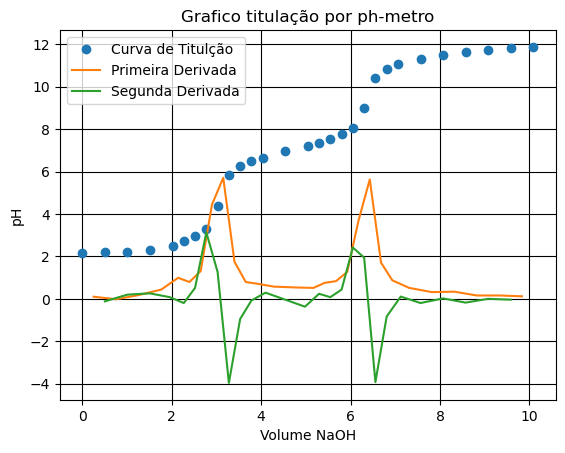

In [29]:
vNaOH=np.array([0,0.5,1,1.5,2,2.25,2.5,2.75,3,3.25,3.5,3.75,4,4.5,5,5.25,5.5,5.75,6,6.25,6.5,6.75,7,7.5,8,8.5,9,9.5,10])
pH=np.array([2.15,2.2,2.19,2.28,2.5,2.75,2.95,3.28,4.4,5.84,6.28,6.48,6.66,6.95,7.22,7.35,7.54,7.75,8.07,9,10.42,10.85,11.07,11.33,11.49,11.66,11.74,11.82,11.88])

#Equacao Bureta 1
#y=ax+b
a=1.0087
b=-0.0017
r2=0.999998

v=a*vNaOH+b
print (v)
#---------------------------------------------
plt.plot(v, pH, 'o', label='Curva de Titulção')
plt.xlabel('Volume NaOH')
plt.ylabel('pH')
plt.title('Grafico titulação por ph-metro')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_titulacao_potenciomtrica.png', format='png')
#-------------------------------------------------------------------------------
#Primeira derivada:
def derivada(v):
    # Lista para armazenar as derivadas
    derivadas = []
    
    # Loop que começa no segundo elemento (índice 1)
    for i in range(1, len(v)):
        # Calcula a diferença entre o termo atual e o anterior
        dv = v[i] - v[i-1]
        derivadas.append(dv)
    
    return np.array(derivadas)  # Converte para array para melhor manipulação
def volume_medio(v):
    # Lista para armazenar os volumes médios
    volumes = []
    
    for i in range(1, len(v)):
        # Calcula o volume médio entre o termo atual e o anterior
        vm = (v[i] + v[i-1]) / 2
        volumes.append(vm)
    
    return np.array(volumes)  # Retorna como array


derivadas_vNaOH = derivada(v)
derivadas_pH=derivada(pH)
d1=derivadas_pH/derivadas_vNaOH
vmed_NaOH=volume_medio(v)
print (vmed_NaOH,d1)

#-------------------------------------------------------

plt.plot(vmed_NaOH,d1, '-', label='Primeira Derivada')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_titulacao_1devrivada.png', format='png')

#----------------------------------------------------------------
# Segunda derivada
derivadas2_vNaOH = derivada(vmed_NaOH)
derivadas2_pH=derivada(derivadas_pH)
vmed2_NaOH=volume_medio(vmed_NaOH)
d2=derivadas2_pH/derivadas2_vNaOH

plt.plot(vmed2_NaOH, d2, '-', label='Segunda Derivada')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_titulacao2derivada.png', format='png')

Valores de ph: [-0.118965    0.19827501  0.25775751  0.07931    -0.19827501  0.51551502
  3.13274512  1.26896005 -3.96550015 -0.95172004 -0.07931     0.29080334
 -0.039655   -0.37011335  0.23793001  0.07931     0.43620502  2.41895509
  1.94309507 -3.92584515 -0.83275503  0.10574667 -0.19827501  0.0198275
 -0.17844751  0.         -0.039655  ]


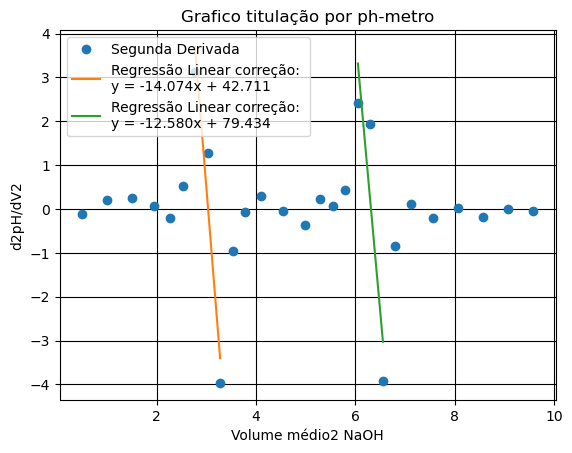

In [31]:
# Segunda derivada
derivadas2_vNaOH = derivada(vmed_NaOH)
derivadas2_pH=derivada(derivadas_pH)
vmed2_NaOH=volume_medio(vmed_NaOH)
d2=derivadas2_pH/derivadas2_vNaOH

plt.plot(vmed2_NaOH, d2, 'o', label='Segunda Derivada')
plt.xlabel('Volume médio2 NaOH')
plt.ylabel('d2pH/dV2')
plt.title('Grafico titulação por ph-metro')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_titulacao2derivada.png', format='png')

print ( "Valores de ph:",d2)

pv1=d2[6:9]
pv2=d2[17:20]
pvNaOH1=vmed2_NaOH[6:9]
pvNaOH2=vmed2_NaOH[17:20]

# Regressão linear
coefficients = np.polyfit(pvNaOH1,pv1, 1)  # Coeficientes da regressão linear
poly = np.poly1d(coefficients)   # Objeto polinomial
pv1_fit = poly(pvNaOH1)  # Valores ajustados
plt.plot(pvNaOH1, pv1_fit, '-', label=f'Regressão Linear correção: \ny = {coefficients[0]:.3f}x + {coefficients[1]:.3f}')

# Regressão linear
coefficients = np.polyfit(pvNaOH2,pv2, 1)  # Coeficientes da regressão linear
poly = np.poly1d(coefficients)   # Objeto polinomial
pv2_fit = poly(pvNaOH2)  # Valores ajustados
plt.plot(pvNaOH2, pv2_fit, '-', label=f'Regressão Linear correção: \ny = {coefficients[0]:.3f}x + {coefficients[1]:.3f}')
plt.legend()

In [9]:
#Equacao ponto de viragem 1
a1=-14.074046
b1=42.710947

#equacao ponto de viragem 2
a2=-12.580153
b2=79.434018

def calcular_x (a,b,y):
    x=(y-b)/a
    return x
y=0
x1=calcular_x(a1,b1,y)
x2=calcular_x(a2,b2,y)

print (x1,x2)

3.034731235069148 6.314233062189307


## DETERMINAÇÃO POTENCIOMÉTRICA  DO ÁCIDO ACETILSALICÍLICO EM  COMPRIMIDOS

O ácido acetilsalicílico é um fármaco do grupo dos anti-inflamatórios não esteróides, foi o primeiro fármaco a ser sintetizado na história da farmácia, em julho de 1899, a Bayer começou a comercializar a Aspirina.

Executar uma Análise Quantitativa por Titulação Potenciométrica.

[-0.017     0.48735   0.9917    1.49605   2.0004    2.50475   3.0091
  3.261275  3.51345   3.765625  4.0178    4.269975  4.52215   4.774325
  5.0265    5.278675  5.53085   5.783025  6.0352    6.53955   7.0439
  7.54825   8.0526    8.55695   9.0613    9.56565  10.07    ]


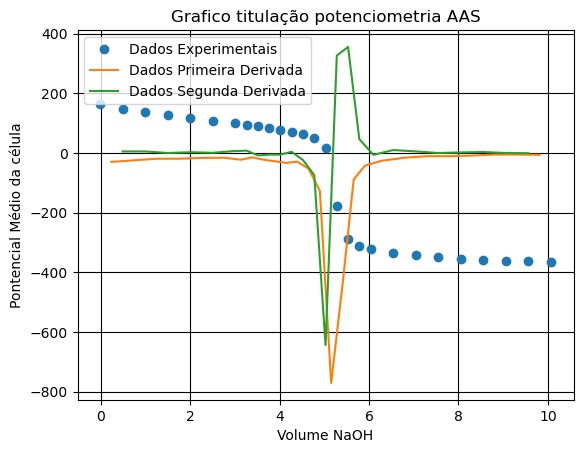

In [39]:
vNaOHe=np.array([0,0.5,1,1.5,2,2.5,3,3.25,3.5,3.75,4,4.25,4.5,4.75,5,5.25,5.5,5.75,6,6.5,7,7.5,8,8.5,9,9.5,10])
E1=np.array([165,152,139,130,120,112,103,98,93,87,80,72,61,40,0,-274,-305,-319,-328,-338,-345,-348,-356,-360,-363,-366,-368])
E2=np.array([163,150,139,127,116,107,100,95,91,85,77,66,64,56,21,-238,-298,-315,-326,-338,-346,-351,-355,-359,-361,-363,-367])
E3=np.array([162,143,130,122,114,106,98,91,89,84,78,72,63,52,31,-19,-264,-300,-312,-329,-338,-346,-350,-355,-358,-361,-364])

E = np.column_stack((E1, E2, E3))
Em=np.mean(E, axis=1)

#Equacao Bureta 1
#y=ax+b
ve=a*vNaOHe+b
print (ve)
#---------------------------------------------
plt.plot(ve, Em, 'o', label='Dados Experimentais')
plt.xlabel('Volume NaOH')
plt.ylabel('Pontencial Médio da célula')
plt.title('Grafico titulação potenciometria AAS')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_titulacao_ass.png', format='png')
#----------------------------------------------------------------
#Primeira Derivada
derivadas_vNaOHe = derivada(ve)
derivadas_Em=derivada(Em)
dEm=derivadas_Em/derivadas_vNaOHe
vmed_NaOHe=volume_medio(ve)
plt.plot(vmed_NaOHe,dEm, '-', label='Dados Primeira Derivada')
plt.legend()
#-------------------------------------------------------------------
#Segunda Derivada
derivadas2_vNaOHe = derivada(vmed_NaOHe)
vmed2_NaOHe=volume_medio(vmed_NaOHe)

derivadas2_Em=derivada(derivadas_Em)
d2Em=derivadas2_Em/derivadas2_vNaOHe
plt.plot(vmed2_NaOHe,d2Em, '-', label='Dados Segunda Derivada')
plt.legend()

O volume utilizado até o ponto de viragem é 5.2722


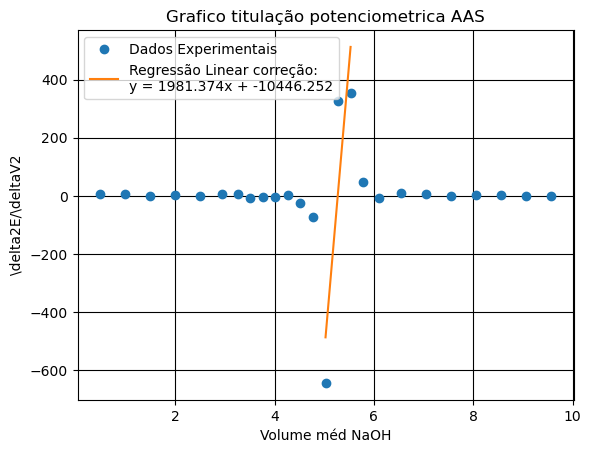

In [41]:
plt.plot(vmed2_NaOHe,d2Em, 'o', label='Dados Experimentais')
plt.xlabel('Volume méd NaOH')
plt.ylabel('\delta2E/\deltaV2')
plt.title('Grafico titulação potenciometrica AAS')
plt.legend()
plt.grid(True,color='k')
plt.savefig('grafico_ass_2deriv.png', format='png')

pv=d2Em[13:16] #intervalo em que forma uma reta e corta o eixo X
pvNaOH=vmed2_NaOHe[13:16]

# Regressão linear
coefficients = np.polyfit(pvNaOH,pv, 1)  # Coeficientes da regressão linear
poly = np.poly1d(coefficients)   # Objeto polinomial
pv_fit = poly(pvNaOH)  # Valores ajustados
plt.plot(pvNaOH, pv_fit, '-', label=f'Regressão Linear correção: \ny = {coefficients[0]:.3f}x + {coefficients[1]:.3f}')
plt.legend()
#y=b+ax
a=coefficients[0]
b=coefficients[1]

def calcular_x (a,b,y):
    x=(y-b)/a
    return x
y=0
x=calcular_x(a,b,y)
print ('O volume utilizado até o ponto de viragem é {:.4f}'.format (x))

#### CÁLCULO DO PRINCÍPIO ATIVO NO COMPRIMIDO DE AAS

In [14]:
massa=np.array([0.4271,0.4286,0.4283,0.4165,0.4305,0.4173,0.4240,0.4105,0.4195])
mmed=np.mean(massa)
n=9
t=2.31
s=np.std(massa, ddof=1) #Calculo de desvio padrao amostral com numpy
Ic=(t*s)/math.sqrt(n)
print('({:.4} +/- {:.2}) g'.format(mmed,Ic))
p=(s/mmed)*100
print ('A precisão é {:.3}%'.format(p))
Cnaoh=0.43 #mol/L
Vgnaoh=np.array([5.123,5.132,5.371,5.118,5.132,4.856,5.112,4.874,4.623]) #mL
MMaas=180.16 #g/mol

Nnaoh=(Vgnaoh*Cnaoh)/1000
Naas=Nnaoh
maas=Naas*MMaas
print('Possui {} mg de AAS por comprimido'. format(maas))

maasmed=np.mean(maas)
saas=np.std(maas, ddof=1) #Calculo de desvio padrao amostral com numpy
Icaas=(t*saas)/math.sqrt(n)
paas = (saas / maasmed) * 100
print('({:.4} +/- {:.3}) g e a precisão é {:.5}%'.format(maasmed,Icaas,paas))
principio_ativo=(maas/massa)*100

principio_ativo_med=np.mean(principio_ativo)
s_principio_ativo=np.std(principio_ativo, ddof=1) #Calculo de desvio padrao amostral com numpy
Ic_principio_ativo=(t*s_principio_ativo)/math.sqrt(n)
p_principio_ativo = (s_principio_ativo / principio_ativo_med) * 100
print('({:.4} +/- {:.3}) g e a precisão é {:.5}%'.format(principio_ativo_med,Ic_principio_ativo,p_principio_ativo))

(0.4225 +/- 0.0053) g
A precisão é 1.62%
Possui [0.39687266 0.39756988 0.41608492 0.39648532 0.39756988 0.37618849
 0.39602051 0.37758293 0.35813826] mg de AAS por comprimido
(0.3903 +/- 0.013) g e a precisão é 4.3256%
(92.36 +/- 2.53) g e a precisão é 3.5576%


## DETERMINAÇÃO DE CAPTOPRIL EM COMPRMIDO POR TITULAÇÃO CONDUTIMÉTRICA

A Titulação condutimétrica depende de $\theta$ e $\lambda$, é realizada a medida da L após cada incremento de titulante sob agitação.

O volume utilizado até o ponto de viragem é 3.6943


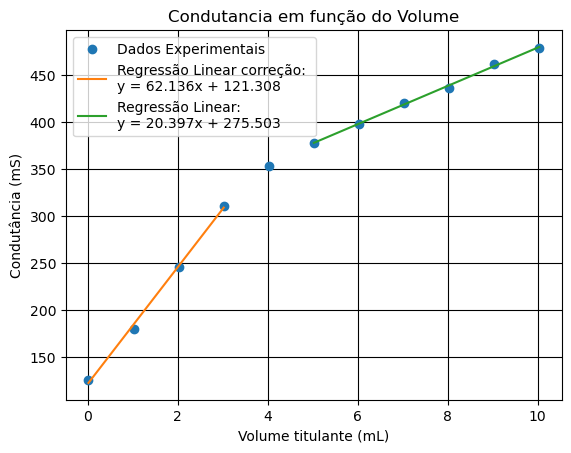

In [16]:
V=np.array([0,1,2,3,4,5,6,7,8,9,10])#Volume de CuSO4
#Coreção de volume bureta 6
a=1.0021
b=0.014
Vc=a*V+b
V0=100#mL
#condutancia medida
L=np.array([[121.1,130.0],
           [175.5,180.6],
            [238.3,243.4],
            [295,309.1],
            [326.1,354.1],
            [346.9,371.8],
            [362.8,388.8],
            [381.5,405.1],
            [393.9,414.6],
            [412.6,434.0],
            [423.2,448.3]])
#Correção da Condutância
m=np.array([0.3190,0.3884,0.3056]) #massa dos comprimidos
Lm=np.mean(L,axis=1)
Lc=Lm*((V0+Vc)/V0)

plt.plot (Vc,Lc,'o',label='Dados Experimentais')
plt.title("Condutancia em função do Volume")
plt.xlabel('Volume titulante (mL)')
plt.ylabel("Condutância (mS)")
plt.legend()
plt.grid (True, color='k')

r1=Lc[0:4]
v1=Vc[0:4]

r2=Lc[5:11]
v2=Vc[5:11]

# Regressão linear
coefficients1 = np.polyfit(v1,r1, 1)  # Coeficientes da regressão linear
poly = np.poly1d(coefficients1)   # Objeto polinomial
r1_fit = poly(v1)  # Valores ajustados
plt.plot(v1, r1_fit, '-', label=f'Regressão Linear correção: \ny = {coefficients1[0]:.3f}x + {coefficients1[1]:.3f}')
plt.legend()
#y=b+ax
a1=coefficients1[0]
b1=coefficients1[1]

# Regressão linear
coefficients2 = np.polyfit(v2,r2, 1)  # Coeficientes da regressão linear
poly = np.poly1d(coefficients2)   # Objeto polinomial
r2_fit = poly(v2)  # Valores ajustados
plt.plot(v2, r2_fit, '-', label=f'Regressão Linear: \ny = {coefficients2[0]:.3f}x + {coefficients2[1]:.3f}')
plt.legend()
#a1x+b1=a2x+b2
a2=coefficients2[0]
b2=coefficients2[1]
def calcular_x (a1,a2,b1,b2):
    x=(b2-b1)/(a1-a2)
    return x

xv=calcular_x(a1,a2,b1,b2)

print ('O volume utilizado até o ponto de viragem é {:.4f}'.format (xv))
plt.savefig('grafico_captopril.png', format='png')

### Cálculo príncio ativo Captopril em comprimido

In [18]:
m_2comp_cap=np.array([0.3275,0.3107,0.3084,0.3190,0.3889,0.3056,0.3184,0.3084,0.3251])
m_1comp_cap=m_2comp_cap/2
M_med_comp_cap=np.mean(m_1comp_cap)
n=9
t=2.31
s_comp_cap=np.std(m_1comp_cap, ddof=1) #Calculo de desvio padrao amostral com numpy
Ic_comp_cap=(t*s_comp_cap)/math.sqrt(n)
print('({:.4} +/- {:.2}) g'.format(M_med_comp_cap,Ic_comp_cap))
p_m_comp_cap=(s_comp_cap/M_med_comp_cap)*100
print ('A precisão é {:.3}%'.format(p_m_comp_cap))
C_cuso4=0.0125 #mol/L
Vg_cuso4=np.array([4.191,3.929,3.827,3.460,2.735,3.870,3.370,3.528,4.067]) #mL
MM_cap=217.27 #g/mol

N_cuso4=(Vg_cuso4*C_cuso4)/1000
N_cap=N_cuso4/2
M_cap=N_cap*MM_cap*1000*2
print('Possui {} mg de Captopril por comprimido'. format(M_cap))

M_cap_med=np.mean(M_cap)#mg
s_M_cap=np.std(M_cap, ddof=1) #Calculo de desvio padrao amostral com numpy
Ic_M_cap=(t*s_M_cap)/math.sqrt(n)
p_M_cap = (s_M_cap / M_cap_med) * 100
print('({:.4} +/- {:.3}) mg e a precisão é {:.5}%'.format(M_cap_med,Ic_M_cap,p_M_cap))
principio_ativo_cap=(M_cap/m_2comp_cap)/10

principio_ativo_med_cap=np.mean(principio_ativo_cap)
s_principio_ativo_cap=np.std(principio_ativo_cap, ddof=1) #Calculo de desvio padrao amostral com numpy
Ic_principio_ativo_cap=(t*s_principio_ativo_cap)/math.sqrt(n)
p_principio_ativo_cap = (s_principio_ativo_cap / principio_ativo_med_cap) * 100
print('({:.2} +/- {:.2}) g e a precisão é {:.5}%'.format(principio_ativo_med_cap,Ic_principio_ativo_cap,p_principio_ativo_cap))

(0.1618 +/- 0.0099) g
A precisão é 7.94%
Possui [11.38223213 10.67067288 10.39365363  9.3969275   7.42791813 10.51043625
  9.15249875  9.581607   11.04546363] mg de Captopril por comprimido
(9.951 +/- 0.932) mg e a precisão é 12.163%
(3.1 +/- 0.39) g e a precisão é 16.178%


## DETERMINAÇÃO DA CONDUTIVIDADE ELÉTRICA EM AMOSTRAS DE ÁGUA

Na análise condutimétrica direta temos:

$$ L=\frac{A}{d}\sum c_i \cdot \lambda _i $$

Tal que:
$$k=L\frac{d}{A}=L\theta=\sum c_i \cdot \lambda _i$$

Foi medida a condutividade elétrica das seguintes amostras:

- Água destilada do laboratório;
- Água deionizada por troca iônica;
- Água deionizada por osmose reversa;
- Água da torneira;
- Água do bebedouro;
- Água mineral.

R^2: 0.9922263408396046
                      Milli_Q  Deionizada    Torneira   Bebedouro    Mineral
Média                1.240000    1.053333  150.166667  140.766667  32.843333
Desvio Padrão        0.206640    0.055076    0.057735    5.533835   0.248261
Intervalo Inferior   0.726995    0.916602  150.023333  127.028333  32.227000
Intervalo Superior   1.753005    1.190065  150.310000  154.505000  33.459667
Precisão %          16.664499    5.228706    0.038447    3.931211   0.755893


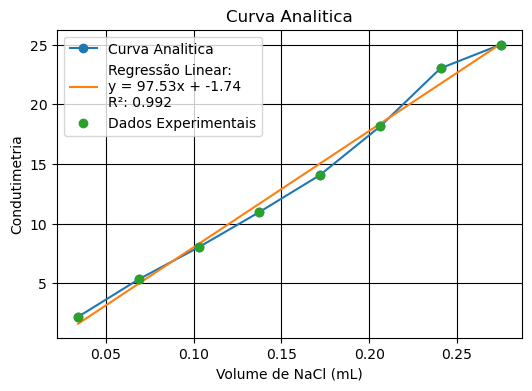

In [93]:
coduntimetria_Agua={
    'Milli_Q': np.array([1.07,1.18,1.47]),
    'Deionizada': np.array([1,1.11,1.05]),
    'Torneira': np.array([150.2,150.2,150.1]),
    'Bebedouro': np.array([134.6,145.3,142.4]),
    'Mineral': np.array([33.13,32.7,32.7]),
} #K/muS
df = pd.DataFrame(coduntimetria_Agua)
condutividade_soro={
    'Sorimax': np.array([13.65,13.69,13.66]),
    'Arboreto': np.array([13.86,13.88,13.89]),
} #K/mS

#CURVA ANALITCA
V_NaCl=np.array([2.5,5,7.5,10,12.5,15,17.5,20])
K_mS_corrigido=np.array([2.197,5.327,8.037,10.968,14.057,18.147,23.017,25.007])

MM_NaCl=58.44
c_mv=20.083
v_balao=250
cNaCl_padrao=(c_mv*1000)/(100*MM_NaCl) #mol/L
c_curva=cNaCl_padrao*V_NaCl/v_balao #concentração de NaCl

coefficients_agua = np.polyfit(c_curva, K_mS_corrigido, 1) 
poly = np.poly1d(coefficients_agua)  
K_mS_corrigido_fit = poly(c_curva) 

# Valores ajustados de K_mS corrigido
K_mS_corrigido_fit = poly(c_curva)

# Calcular R^2
r2 = r2_score(K_mS_corrigido, K_mS_corrigido_fit)

print(f"R^2: {r2}")

plt.figure(figsize=(6, 4))  # Configurar tamanho do gráfico
plt.plot(c_curva, K_mS_corrigido, 'o-', label='Curva Analitica')
plt.plot(c_curva, K_mS_corrigido_fit, '-', label=f'Regressão Linear:\ny = {coefficients_agua[0]:.2f}x + {coefficients_agua[1]:.2f} \nR²: {r2:.3f}')


plt.plot (c_curva,K_mS_corrigido,'o',label="Dados Experimentais")
plt.title ('Curva Analitica')
plt.ylabel ('Condutimetria')
plt.xlabel('Volume de NaCl (mL)')
plt.legend()
plt.grid (True, color='k')

#Analise das amostras
#Calculo de desvio padrao e intervalo de confiança das amostras

def calcular_estatisticas(coluna):
    n = 3
    media = coluna.mean()
    desvio_padrao = coluna.std(ddof=1)  # ddof=1 para amostra
    t_critico = 4.3  # Distribuição t de Student
    erro_padrao = desvio_padrao / np.sqrt(n)
    intervalo = t_critico * erro_padrao
    return pd.Series({
        'Média': media,
        'Desvio Padrão': desvio_padrao,
        'Intervalo Inferior': media - intervalo,
        'Intervalo Superior': media + intervalo,
        'Precisão %': (desvio_padrao/media)*100
    })

# Aplicar a função a cada coluna
resultados = df.apply(calcular_estatisticas)

print(resultados)


## Espectrofotometria de Absorção Molecular
A **Espectrofotometria de Absorção Molecular** é uma técnica analítica baseada na absorção de radiação eletromagnética (UV-Vis) por moléculas em solução, cuja intensidade de absorção é proporcional à concentração da espécie analisada, segundo a Lei de Beer-Lambert.

$$A= \varepsilon \cdot b \cdot c$$
>A= absorbância
>
>$\varepsilon$ = constante de absortividade molar da espécia
>
>b = caminho ótico
>
>c = concentração da espécia

Portanto, obtendo uma curva de intensiudade da absorção (absorbância) em função da concentração, conhecida como curva de calibração para uma dada substância, é possível determinar concentraçã de soluções da epécie absorvente.

### Determinação de Fe(II) em Fortificante

- Análise quantitativa pelo método da curva analítica espectrofotométrica
- Interferência espectrofotométrica

A solução de $Fe^{2+}$ é incolor, por isso foi adicionado 1,10-fenantrolina 0,2 (%m/v), para dessa maneira, formar complexo de coloração vermelha, perceptovel ao espectrofotométro. 

O coeficiente angular da reta nos dá o valor do produto entre a constante de absortividade $\varepsilon$ e o caminho ótico *b*.
$$y=a\cdot x + b$$
$$A=\varepsilon\cdot b \cdot c $$
Temos que:
- y = A
- x = c

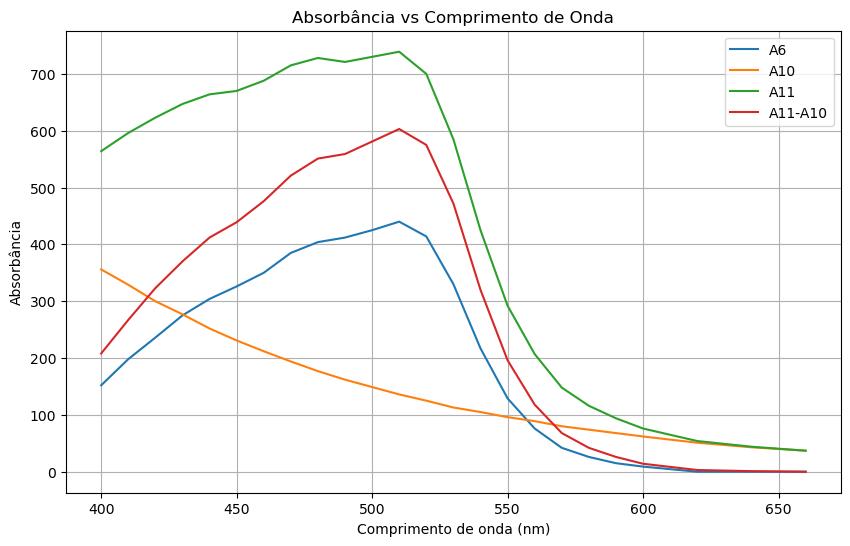

In [99]:
comprimento_onda_fortigicante=np.array([400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,620,640,660])
absorbancias_fortificante = {
    "A6":  np.array([152, 198, 236, 275, 304, 326, 350, 385, 404, 412, 425, 440, 414, 330, 217, 129, 76, 42, 26, 15, 9, 0, 0, 0]),
    "A10": np.array([356, 329, 300, 277, 252, 231, 212, 194, 177, 162, 149, 136, 125, 113, 105, 96, 89, 80, 74, 68, 62, 51, 43, 37]),
    "A11": np.array([564, 596, 623, 647, 664, 670, 688, 715,728, 721, 730, 739, 700, 585, 425, 292, 207, 148, 116, 94, 76, 54, 44, 37]),
}
absorbancias_fortificante["A11-A10"] = absorbancias_fortificante["A11"] - absorbancias_fortificante["A10"]
plt.figure(figsize=(10, 6))
for label, valores in absorbancias_fortificante.items():
    plt.plot(comprimento_onda_fortigicante, valores, label=label)

# Personalização do gráfico
plt.title("Absorbância vs Comprimento de Onda")
plt.xlabel("Comprimento de onda (nm)")
plt.ylabel("Absorbância")
plt.legend()
plt.grid(True)
plt.show()

[0.5484 1.0968 1.6452 2.1936 2.742  3.2904 4.3872 5.484 ]

Valores finais:
Inclinações (a): 0.18974097356612116
Interceptos (b): -0.0007630057803467418
[2.74057833 2.84598519 2.79328176]
-----------------------------------------------
[0.68220036 0.70843884 0.6953196 ]
(0.6953 +/- 0.033) mg/L
A precisão é 1.89%


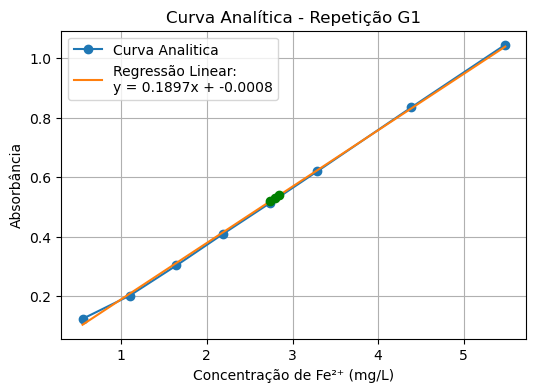

In [38]:
#Valores de absorbância em fução da concentração de Fe2+
solucao_padrao_Fe=54.84 #mg/L
volume_balao_curva=100 #mL
c_fenantrolina = 0.2 #%m/v
V_Fe = np.array([1, 2, 3, 4, 5, 6, 8, 10])  # mL
A_curva_analitica = np.array([0.123, 0.201, 0.303, 0.410, 0.514, 0.620, 0.835, 1.046])
c_Fe=(solucao_padrao_Fe*V_Fe)/volume_balao_curva
print (c_Fe)
coefficients = np.polyfit(c_Fe, A_curva_analitica, 1) 
poly = np.poly1d(coefficients)  
A_curva_analitica_fit = poly(c_Fe)  
    
plt.figure(figsize=(6, 4))  # Configurar tamanho do gráfico
plt.plot(c_Fe, A_curva_analitica, 'o-', label='Curva Analitica')
plt.plot(c_Fe, A_curva_analitica_fit, '-', label=f'Regressão Linear:\ny = {coefficients[0]:.4f}x + {coefficients[1]:.4f}')

plt.title(f'Curva Analítica - Repetição G1')
plt.xlabel("Concentração de Fe²⁺ (mg/L)")
plt.ylabel("Absorbância")
plt.grid (True)
plt.legend()



#Faixa linear de trabalho - onde existe uma relação linear entre o sinal analítico e a concentração.

a_values = coefficients[0]
b_values = coefficients[1]

v_amostra = 1 #mL
# Exibir os coeficientes finais
print("\nValores finais:")
print("Inclinações (a):", a_values)
print("Interceptos (b):", b_values)

# Valores de absorbância das soluções siluidas da amostra
A_amostra = np.array([0.520,0.540,0.530])
volume_balao_amostra=50
c_amostra = (A_amostra)/a_values #mg/L
plt.plot(c_amostra,A_amostra,'go')

print (c_amostra)
MM_complexo=180.1 #g/mol
MM_FeSO4_7H2O=278.05 #g/mol
MM_Fe=55.85
c_FeSO4=((MM_FeSO4_7H2O/MM_Fe)*c_amostra)*(volume_balao_amostra)/1000
print('-----------------------------------------------')
print (c_FeSO4)
#Calculo de desvio padrao e intervalo de confiança
n=3
t=4.3
med_c_FeSO4=np.mean(c_FeSO4)
s_c_FeSO4=np.std(c_FeSO4, ddof=1) #Calculo de desvio padrao amostral com numpy
Ic_c_FeSO4=(t*s_c_FeSO4)/math.sqrt(n)
print('({:.4} +/- {:.2}) mg/L'.format(med_c_FeSO4,Ic_c_FeSO4))
p_c_FeSO4=(s_c_FeSO4/med_c_FeSO4)*100
print ('A precisão é {:.3}%'.format(p_c_FeSO4))

## DETERMINAÇÃO DE ÁCIDO ASCÓRBICO EM COMPRIMIDO

A determinação direta do ácido ascórbico na região do ultravioleta é prejudicada pela presença de diferentes espécies que absorvem os mesmos comprimentos de onda. Na região do visível nem o ácido ascórbico, nem os demais componentes absorvem, pode-se fazer um quantificação indireta nesta região que está isenta de interferentes.
$$2Fe^{3+}~+~AA~\rightleftharpoons~2Fe^{2+}$$
$$Fe^{3+}_{incolor}~+~SCN^{-}_{incolor}~\rightleftharpoons~[FeSCN]^{2+}_{vermelho}$$

$$A=a\cdot C_{Fe^{2+}}~+~b$$

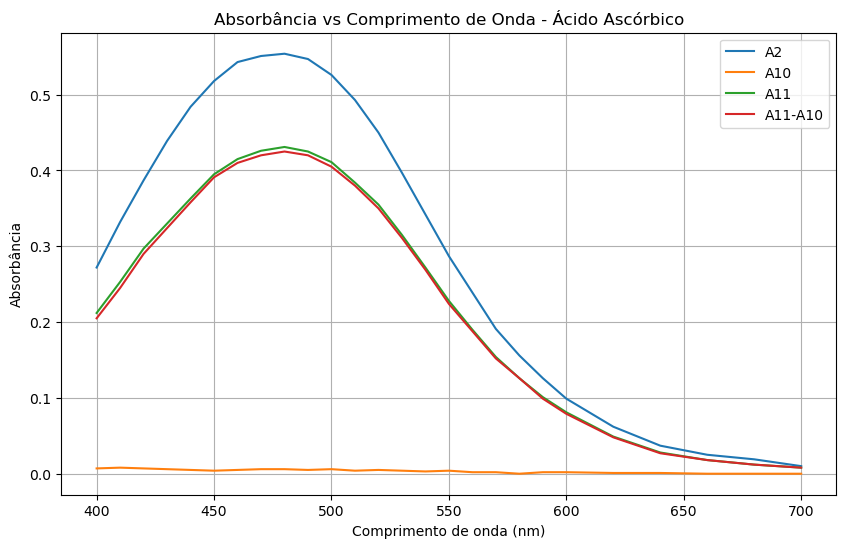

In [103]:
comprimento_onda_AA=np.array([400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,620,640,660,680,700])
absorbancias_AA = {
    "A2":  np.array([0.272, 0.332, 0.387, 0.439, 0.484, 0.518, 0.543, 0.551, 0.554, 0.547, 0.526, 0.493, 0.450, 0.397, 0.342, 0.287, 0.239, 0.191, 0.156, 0.126, 0.099, 0.062, 0.037, 0.025, 0.019,0.010]),
    "A10": np.array([0.007, 0.008, 0.007, 0.006, 0.005, 0.004, 0.005, 0.006, 0.006, 0.005, 0.006, 0.004, 0.005, 0.004, 0.003, 0.004, 0.002, 0.002, 0.000, 0.002, 0.002, 0.001, 0.001, 0.000, 0.000,0.000]),
    "A11": np.array([0.212, 0.253, 0.297, 0.330, 0.363, 0.395, 0.415, 0.426, 0.431, 0.425, 0.411, 0.384, 0.355, 0.315, 0.272, 0.228, 0.190, 0.154, 0.126, 0.101, 0.081, 0.049, 0.028, 0.018, 0.012,0.008]),
}

absorbancias_AA["A11-A10"] = absorbancias_AA["A11"] - absorbancias_AA["A10"]

plt.figure(figsize=(10, 6))
for label, valores in absorbancias_AA.items():
    plt.plot(comprimento_onda_AA, valores, label=label)

# Personalização do gráfico
plt.title("Absorbância vs Comprimento de Onda - Ácido Ascórbico")
plt.xlabel("Comprimento de onda (nm)")
plt.ylabel("Absorbância")
plt.legend()
plt.grid(True)
plt.show()


[0.     0.4875 0.975  1.4625 1.95   2.925  3.9    4.875 ]
Coeficiente angular (a): -0.080
Coeficiente linear (b): 0.556
[1.58575994 1.54836648 1.43618608]
---------------------------------------------
[0.079288   0.07741832 0.0718093 ]


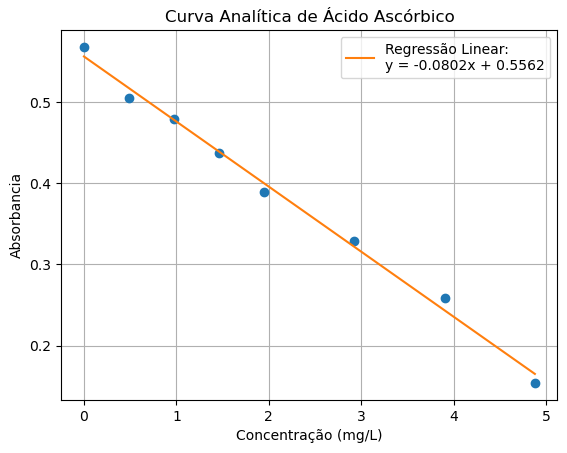

In [71]:
solucao_padrao_AA=487.5 #mg/L
volume_balao_curva=100 #mL
volume_balao_amostra=50 #mL
c_padrao_fe3=90 #mg/L
c_padrao_SCN=0.37 #mol/L
v_AA=np.array([0,100,200,300,400,600,800,1000]) #uL
A_curva_analitica_AA=np.array([0.568,0.505,0.479,0.437,0.389,0.329,0.259,0.154])

c_AA=(solucao_padrao_AA*v_AA)/(volume_balao_curva*10**3) #mg/L

coefficients_AA = np.polyfit(c_AA, A_curva_analitica_AA, 1) 
poly = np.poly1d(coefficients_AA)  
A_curva_analitica_AA_fit = poly(c_AA)  

print(c_AA)

plt.plot (c_AA,A_curva_analitica_AA,'o')
plt.plot(c_AA, A_curva_analitica_AA_fit, '-', label=f'Regressão Linear:\ny = {coefficients_AA[0]:.4f}x + {coefficients_AA[1]:.4f}')
#plt.plot(c_amostra_AA,A_amostra_AA,'o')
plt.title('Curva Analítica de Ácido Ascórbico')
plt.ylabel ('Absorbancia')
plt.xlabel('Concentração (mg/L)')
plt.grid (True)
plt.legend()

# Exibir coeficientes da regressão
print(f"Coeficiente angular (a): {coefficients_AA[0]:.3f}") #mg/L
print(f"Coeficiente linear (b): {coefficients_AA[1]:.3f}")

A_amostra_AA=np.array([0.429,0.432,0.441])
v_amostra_AA=100*10**(-3) #mL

c_AA=(A_amostra_AA-coefficients_AA[1])/coefficients_AA[0]
print (c_AA)

#Ajuste da concentração para o comprimido
#Diluição incial: o comprimido foi diluido em um balão de 1L, o comprimido pesa 1g
c_comprimido=(c_AA*volume_balao_amostra)/(1000)
print ('---------------------------------------------')
print (c_comprimido)

## Determinação de Cálcio em Comprimido

Comparação entre Turbimetria e Nefelometria e determinar a concentração de cálcio em comprimidos.

### Turbidez
Mais apropriada para altas concentrações de partículas dispersas.
$$S=-log\frac{I}{I_0}~=~k\frac{b~c~d^3}{\lambda^4}$$
- k = constante que leva em consideração os índices de refração da partícula e do meio, a forma da partícula, ângulo e geometria do instrumento.
- b = caminho ótico.
- c = número de partículas por unidade de volume.
- d = diâmetro da partícula.
- $\lambda$ = comprimento de onda incidente.

$$-log~T~=~k~b~c$$

### Nefelometria
Mais apropriada para baixas concentrações de partículas dispersas.
$$I_s~=~K_s~I_0~c$$

## Espectrofluorimetrica

$$F=2,30\cdot I_0 \cdot k \cdot \epsilon \cdot b \cdot c$$

- $I_0$: Intensidade da radiação incidente
- k: Constante relacionada à sensibildade da radiação fluorescente
- $\epsilon$: constante absortiva
- b: caminho ótico
- c: concentração

### Objetivo
- Determinar a concentração de quinina em refrigerante

- Para a análise de quininas é utilizado $\lambda_{excitação}$ em 350n, e o de $\lambda_{emissao}$ em 450nm no espectrofluorímetro, obtem as leituras em intensidade de emissão fluorescente em mV das soluções e descontar i valor do branco.

- Contruir as curvas analíticas (F vs C)

- Interpolar cada sinal analítico, descontando do valor do branco, nas respectivas curvas analíticas e obter a concentração correspondente.

- Calcular a concentrçãode quinina, em mg/100 mL presente na amostra, obtida para cada solução preparada e analisada

- Obter a solução média e o intervalo de confiança oara cada curva analítica.

[ 1.014  2.028  3.042  4.056  6.084  8.112 10.14 ]


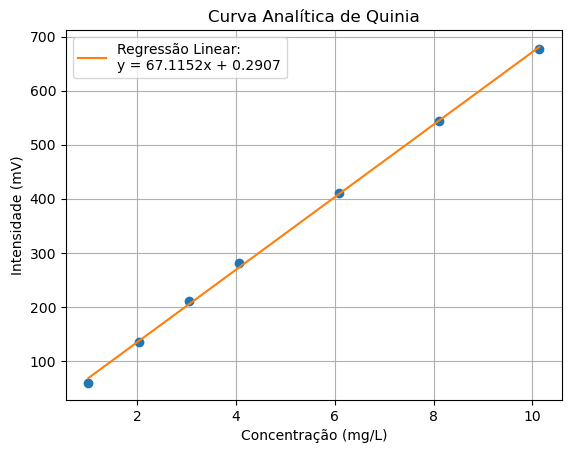

In [30]:
conc_soluc_pd_quinina=50.7 #mg/L
vol_balao_curva=50 #mL
vol_pd_curva=np.array([1,2,3,4,6,8,10])
conc_pd_curva=(conc_soluc_pd_quinina*vol_pd_curva)/vol_balao_curva

print (conc_pd_curva)

sa_espectrofluorimetro=np.array([59.3,134.3,210,282,409.7,543.8,676.8])

coefficients_quinina = np.polyfit(conc_pd_curva, sa_espectrofluorimetro, 1) 
poly = np.poly1d(coefficients_quinina)  
sa_espectrofluorimetro_fit = poly(conc_pd_curva)  


plt.plot (conc_pd_curva,sa_espectrofluorimetro,'o')
plt.plot(conc_pd_curva, sa_espectrofluorimetro_fit, '-', label=f'Regressão Linear:\ny = {coefficients_quinina[0]:.4f}x + {coefficients_quinina[1]:.4f}')
#plt.plot(c_amostra_AA,A_amostra_AA,'o')
plt.title('Curva Analítica de Quinia')
plt.ylabel ('Intensidade (mV)')
plt.xlabel('Concentração (mg/L)')
plt.grid (True)
plt.legend()


Preparou três (3) soluções em balões de 50mL contando 5mL de amostra + 5mL de $H_2SO_4$ e completar balão com água, em seguida homogeneizar e realizar análise.


In [84]:
vol_amostra = 5  # mL
sa_amostra_ant = np.array([271.8, 278.4, 274.5])
sa_amostra_sch = np.array([291.8, 288.4, 294.5])

#y=67.1152x+0.2907
c_amostra_curv_ant=(sa_amostra_ant-coefficients_quinina[1])/coefficients_quinina[0]
c_amostra_curv_sch=(sa_amostra_sch-coefficients_quinina[1])/coefficients_quinina[0]

print (c_amostra_curv_ant,c_amostra_curv_sch)

# Função para cálculo de estatísticas
def calcular_estatisticas_quinia(amostras):
    n = len(amostras)  # Número de amostras
    media = amostras.mean()
    desvio_padrao = amostras.std(ddof=1) 
    t = 4.3  # Valor crítico da distribuição t de Student para n-1 graus de liberdade
    erro_padrao = desvio_padrao / np.sqrt(n)
    intervalo = t * erro_padrao
    return {
        'Média': media,
        'Desvio Padrão': desvio_padrao,
        'Intervalo de Confiança': intervalo,
        'Precisão (%)': (desvio_padrao / media) * 100
    }

# Aplicar a função às amostras
resultados_ant = calcular_estatisticas_quinia(c_amostra_curv_ant)
resultados_sch = calcular_estatisticas_quinia(c_amostra_curv_sch)

# Criar um DataFrame para organizar os resultados
resultados = pd.DataFrame({
    'Antarctica': resultados_ant,
    'Scheppes': resultados_sch
})

print(resultados)

c_amostra_ant=((c_amostra_curv_ant*vol_balao_curva)/vol_amostra)/10
c_amostra_sch=((c_amostra_curv_sch*vol_balao_curva)/vol_amostra)/10


resultados_con_ini_ant = calcular_estatisticas_quinia(c_amostra_ant)
resultados_con_ini_sch = calcular_estatisticas_quinia(c_amostra_sch)

# Criar um DataFrame para organizar os resultados
resultados_final = pd.DataFrame({
    'Antarctica mg/100mL': resultados_con_ini_ant,
    'Scheppes mg/100mL': resultados_con_ini_sch
})
print(resultados_final)

[4.04541921 4.14375754 4.08564853] [4.34341415 4.29275501 4.38364347]
                        Antarctica  Scheppes
Média                     4.091608  4.339938
Desvio Padrão             0.049439  0.045544
Intervalo de Confiança    0.122738  0.113067
Precisão (%)              1.208310  1.049413
                        Antarctica mg/100mL  Scheppes mg/100mL
Média                              4.091608           4.339938
Desvio Padrão                      0.049439           0.045544
Intervalo de Confiança             0.122738           0.113067
Precisão (%)                       1.208310           1.049413


### Adição de Padrão

A Concentração do analito na última solução deve ser o dobro da Concentrção total da 1°.

Os resultados obtidos pelo metódo de adição de padrão levam em consideração o efeito de matriz, interferentes de influência externa, trazendo maior semelhança com a solução. A curva analítica não leva em consideração e, dessa froma, interfentes presentes na solução promovem grande diferença com a real concentração do analito.

4.8123006792992555


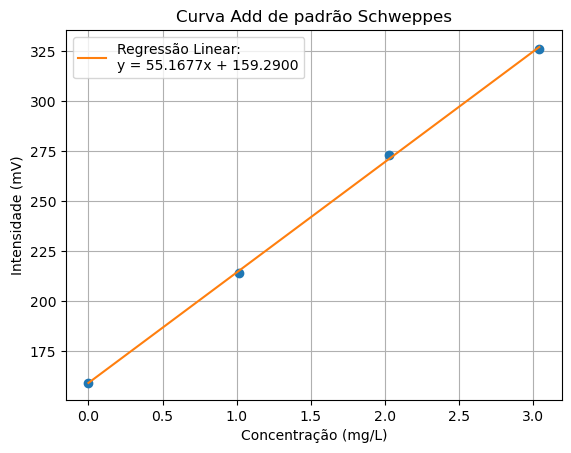

In [100]:
vol_amostra_add_pa=3 #ml
vol_q_pd=np.array([0,1,2,3])
conc_pd_add_pa=(conc_soluc_pd_quinina*vol_q_pd)/vol_balao_curva
sa_add_pa=np.array([159.4,214,273.3,326.1])

coefficients_quinina_add_pa = np.polyfit(conc_pd_add_pa, sa_add_pa, 1) 
poly = np.poly1d(coefficients_quinina_add_pa)  
sa_add_pa_fit = poly(conc_pd_add_pa)  


plt.plot (conc_pd_add_pa,sa_add_pa,'o')
plt.plot(conc_pd_add_pa, sa_add_pa_fit, '-', label=f'Regressão Linear:\ny = {coefficients_quinina_add_pa[0]:.4f}x + {coefficients_quinina_add_pa[1]:.4f}')
#plt.plot(c_amostra_AA,A_amostra_AA,'o')
plt.title('Curva Add de padrão Schweppes')
plt.ylabel ('Intensidade (mV)')
plt.xlabel('Concentração (mg/L)')
plt.grid (True)
plt.legend()

#y=0

con_balao=coefficients_quinina_add_pa[1]/coefficients_quinina_add_pa[0]
con_amostra_sch=(con_balao*vol_balao_curva)/vol_amostra_add_pa/10

print (con_amostra_sch)

## DETERMINAÇÃO DE SÓDIO E POTASSIO EM SORO DE HIDRATAÇÃO ORAL

Aplicação da fotometria de chama, a emissão atômica se dá pela absorção de energia térmica.

A emissão de radiação eletromagnética se dá no cone extern e é proporcional à quantidade de átomos que passaram para o estado eletronico excitado.

### Metódo da curva analítica;

#### Seletividade e Sensibilidade:
- $\lambda_{excitação}$
- Energia da fonte etomizadora
- Interferentes


Neste metódo são adcionados concentrações conhecidas e crescentes à um conjunto de soluções contendo a mesma quantidade de amostras, todas as soluções estarão sujeitas aos mesmos interferentes presentes na amostra e todos os sinais analíticos soferão a mesma influência externa e na mesma intensidade. A concentração total do analito na última solução (padrão + amostra) deve conter aproximadamente o dobro da solução 1 (amostra).

- Dispensa tratamento de amostra;
- Análise feita na presença dos interferentes;
- Maior exatidão.

Para planejar o preparo das soluções para o metódo da adição de padrão precisa saber: Faixa Linear de Trabalho (FLT) e a concentrção aproximada do analíto na amostra.


A faixa linear de trabalho é entre (2.08-8.02) mg/L


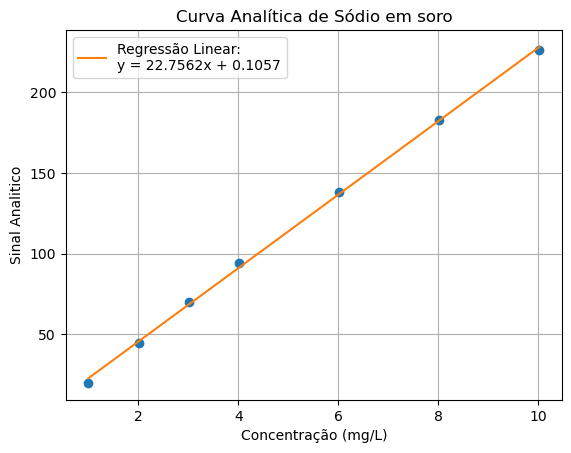

In [140]:
# Analisando Sódio (Na)
#Curva análitica para deternimar a FLT 

c_pa_na = 50.1 # Solução padrao estoque de sódio mg/L
v_balao = 50 # volume do balaão volumetrico mL

v_curva_na=np.array([1,2,3,4,6,8,10])
c_curva_na=(c_pa_na*v_curva_na)/v_balao
sa_curva_na=np.array([20,45,70,94,138,183,226])

coefficients_Na = np.polyfit(c_curva_na, sa_curva_na, 1) 
poly = np.poly1d(coefficients_Na)  
sa_curva_na_fit = poly(c_curva_na)  


plt.plot (c_curva_na,sa_curva_na,'o')
plt.plot(c_curva_na, sa_curva_na_fit, '-', label=f'Regressão Linear:\ny = {coefficients_Na[0]:.4f}x + {coefficients_Na[1]:.4f}')
#plt.plot(c_amostra_AA,A_amostra_AA,'o')
plt.title('Curva Analítica de Sódio em soro')
plt.ylabel ('Sinal Analitico')
plt.xlabel('Concentração (mg/L)')
plt.grid (True)
plt.legend()

print ("A faixa linear de trabalho é entre (2.08-8.02) mg/L")

In [122]:
# A partir da bula vamos determinar a concentração aproximada do analíto na amostra.

MM_Na=22.9898 #g/mol
c_bula_Na=90 #mmol
m_sache=27.9 #g
m_sache_utilizada=1.1049 #g

c_bula_na_mol=c_bula_Na*MM_Na

#Como não foi utilizado todo o conteúdo do envelope, temos que calcular a concentração aproximada dos analitos na asolução de amostra diluída preparda

c_ap_na_bula=(m_sache_utilizada*c_bula_na_mol)/m_sache

# Para a curva analítica será necessário um volume de amostra diluída (x) que proporcione uma concentração de 5 mg/L nas soluções.
c1=5 #mg/L
v1=50 #volume do balão
c2=c_ap_na_bula

v2=c1*v1/c2

# Finalizamos a curva analitica, com os sinal determinamos a concentração média e seu intervalo de confiança

81.94009683870968 3.0510093305368953


## Adição de Padrão
Pelo planejamento vamos ter 5 balões:

| Solução | [ ]_am  | [ ]_pd  | [ ]_total      |
|-------------|----|-----|-------|
| 1           | -  | -   | -     |
| 2           | Cx | -   | Cx    |
| 3           | Cx | Cw  | Cx+Cw |
| 4           | Cx | Cy  | Cx+Cy |
|5            |Cx  | Cz  | Cx+Cz |

Cx+Cz= 2Cx //

Cz=Cx

Sabendo que a FLT é entre 2 - 8 mg/L, podemos preparar uma solução de amostra de 3mg/L e de solução padrao de 3mg/L resultando uma concentração total de 6mg/L.

In [151]:
c_prev_add_pa_na=3 #concentração prevista para o metódo de adiçãod e padrão mg/L
v2_add_pa_amostra= (c_prev_add_pa_na*v1)/c2 #Calculo para determinar quanto iremos pipetar de amostra para preparar uma solução diluida com concentração no meio da FLT
C_corg_pa_amostra_na=(v2_add_pa_amostra*c2)/v1

v2_add_pa=(c_prev_add_pa_na*v1)/c_pa_na #calculo d=para determinar quanto de padrao vamos pipetar

print (v2_add_pa)
# como deu um numero decimal iremos arredondar para 2ml, com isso refaremos o calculo da concentração para 2ml de solução de amostra e 3ml de padrão.

sa_add_pa_na=np.array([86,110,139,162])

coefficients_pa_Na = np.polyfit(C_corg_add_pa_na, sa_add_pa_na, 1) 
poly = np.poly1d(coefficients_pa_Na)  
sa_add_pa_na_fit = poly(C_corg_add_pa_na)  


plt.plot (C_corg_add_pa_na,sa_add_pa_na,'o')
plt.plot(C_corg_add_pa_na, sa_add_pa_na_fit, '-', label=f'Regressão Linear:\ny = {coefficients_pa_Na[0]:.4f}x + {coefficients_pa_Na_pa[1]:.4f}')
#plt.plot(c_amostra_AA,A_amostra_AA,'o')
plt.title('Curva Analítica de Sódio em soro')
plt.ylabel ('Sinal Analitico')
plt.xlabel('Concentração (mg/L)')
plt.grid (True)
plt.legend()

2.9940119760479043


TypeError: expected 1D vector for x